## 读入数据

In [ ]:
import pandas as pd

data = pd.read_csv('hair_dryer.tsv', delimiter="\t") 
data

## 星级评分是否有可信度（通过检验星级评分分布是否具有差异性）

### 1.计算总平均星级评分

In [39]:
average_rating = data['star_rating'].mean()
print("总平均星级评分:", average_rating)

总平均星级评分: 4.116041848299913


### 2.对星级评分进行 Kolmogorov-Smirnov 检验，检验分布是否符合正态分布
在检验正态分布时，通常会使用 Kolmogorov-Smirnov（KS）检验或 Shapiro-Wilk（SW）检验。这两种检验方法都是常用的统计检验方法，用于检验数据是否来自正态分布。
通常情况下，Shapiro-Wilk 检验对于小样本（通常少于5000个观测值）具有更好的效果，而Kolmogorov-Smirnov 检验适用于更大的样本。我们的检验样本较大，所以采取Kolmogorov-Smirnov 检验


In [50]:
from scipy import stats
import pandas as pd

# 将所有星级评分数据合并为一个整体样本
total_star_ratings = data['star_rating']

# 执行 Kolmogorov-Smirnov 检验
stat, p_value = stats.kstest(total_star_ratings, 'norm')
print(f"Kolmogorov-Smirnov 检验结果：统计量={stat}, p值={p_value}")

Kolmogorov-Smirnov 检验结果：统计量=0.8872760232392662, p值=0.0


p值很小，这表明观察到的数据与原假设之间存在着极其显著的差异，所以拒绝原假设，认为数据不符合正态分布

### 3.用变异系数（Coefficient of Variation，CV）（标准差与均值的比值）衡量数据的相对变异程度。变异系数越大，表示数据的变异程度越大。

In [49]:
# 假设 df 是包含数据的 DataFrame，star_rating 是列名
star_rating_data = data['star_rating']

# 计算均值和标准差
mean_rating = star_rating_data.mean()
std_deviation = star_rating_data.std()

# 计算变异系数
coefficient_of_variation = std_deviation / mean_rating

print("均值:", mean_rating)
print("标准差:", std_deviation)
print("变异系数:", coefficient_of_variation)

均值: 4.116041848299913
标准差: 1.3003332403163912
变异系数: 0.31591837212575474


变异系数为 0.32，意味着数据的标准差大约是均值的 32%。这种情况下，数据的相对变异程度较大，即数据的离散程度较高。数据的分布相对不稳定，个别数值与整体均值之间存在较大的波动或差异。

### 所以，由以上三点，星级评分之间差异性较大，所以具有可信度，可以对其进行分析

## 计算产品不同系列的平均星级评分，以了解其在市场上的整体受欢迎程度。

In [41]:
import pandas as pd
# 计算每个产品标题的平均星级评分
average_star_rating = data.groupby('product_id')['star_rating'].mean().reset_index()

# 按平均星级评分降序排列
average_star_rating = average_star_rating.sort_values(by='star_rating', ascending=False)

# 显示每个产品标题的平均星级评分
print(average_star_rating)

     product_id  star_rating
269  B001CJJ5WC          5.0
360  B002C7DK7Y          5.0
164  B000PEJJ4Y          5.0
382  B002N5MKLW          5.0
378  B002LQBMIA          5.0
..          ...          ...
365  B002D4B7PS          1.0
362  B002CGSDCW          1.0
199  B000VWQA9C          1.0
202  B000WEG4BI          1.0
282  B001ELJO0Q          1.0

[538 rows x 2 columns]


### 产品id出现次数前9名的星级评分分布小提琴图

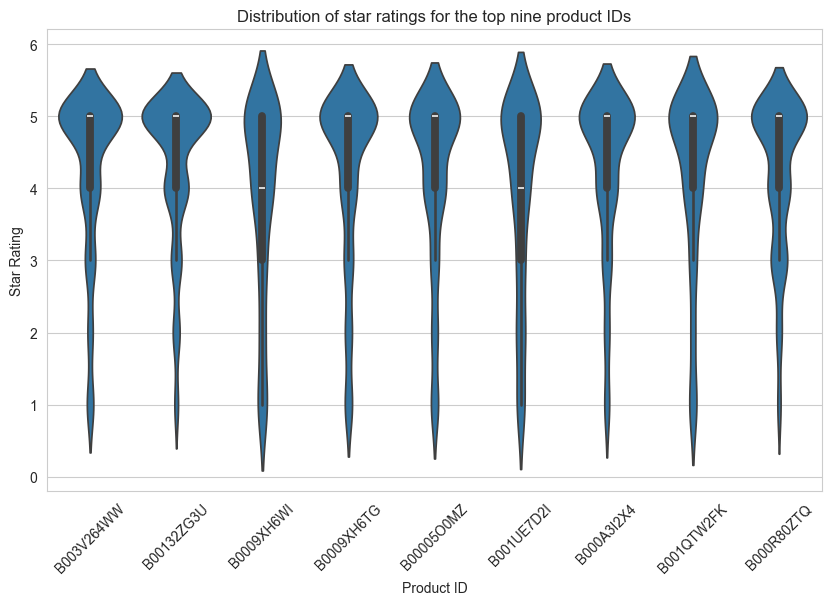

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
# 选择出现次数最多的前九个产品ID
top_product_ids = data['product_id'].value_counts().head(9).index.tolist()

# 绘制小提琴图来比较这九个产品ID的评分分布
plt.figure(figsize=(10, 6))
sns.violinplot(x='product_id', y='star_rating', data=data[data['product_id'].isin(top_product_ids)])
plt.title('Distribution of star ratings for the top nine product IDs')
plt.xlabel('Product ID')
plt.ylabel('Star Rating')
plt.xticks(rotation=45)  # 旋转 x 轴刻度标签
plt.show()


星级评分中位数较高>4

### 后9名

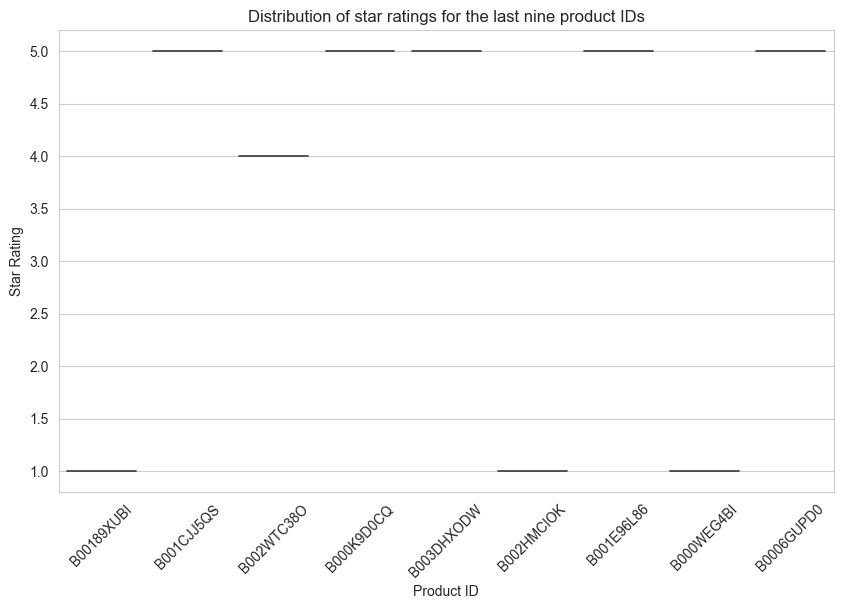

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
# 选择出现次数最多的前九个产品ID
top_product_ids = data['product_id'].value_counts().tail(9).index.tolist()

# 绘制小提琴图来比较这九个产品ID的评分分布
plt.figure(figsize=(10, 6))
sns.violinplot(x='product_id', y='star_rating', data=data[data['product_id'].isin(top_product_ids)])
plt.title('Distribution of star ratings for the last nine product IDs')
plt.xlabel('Product ID')
plt.ylabel('Star Rating')
plt.xticks(rotation=45)  # 旋转 x 轴刻度标签
plt.show()

出现次数较少（基本只出现一次）不构成参考

## 吹风机评论云图

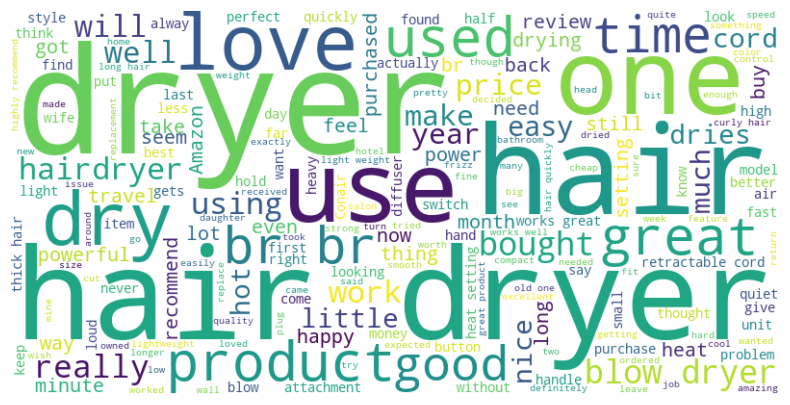

In [44]:
from wordcloud import WordCloud
# 合并评论主题的文本为一个字符串
text = ' '.join(data['review_body'].dropna())

# 创建词云对象并生成词云图
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()

### 去除吹风机的hair和dryer以及一些常见的量词

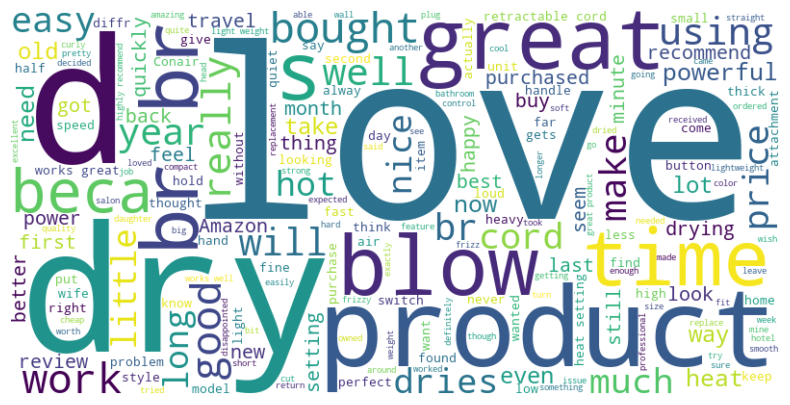

In [45]:
# 去除评论文本中的'hair'和'dryer'词语
data['review_body'] = data['review_body'].str.replace('hair', '').str.replace('dryer', '').str.replace('use', '')

# 去除评论文本中的常见量词
common_quantifiers = ['one', 'two', 'three']  # 添加需要去除的常见量词
for quantifier in common_quantifiers:
    data['review_body'] = data['review_body'].str.replace(quantifier, '')

# 合并评论主题的文本为一个字符串
text = ' '.join(data['review_body'].dropna())

# 创建词云对象并生成词云图
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()

### 不同星级评分的评论云图

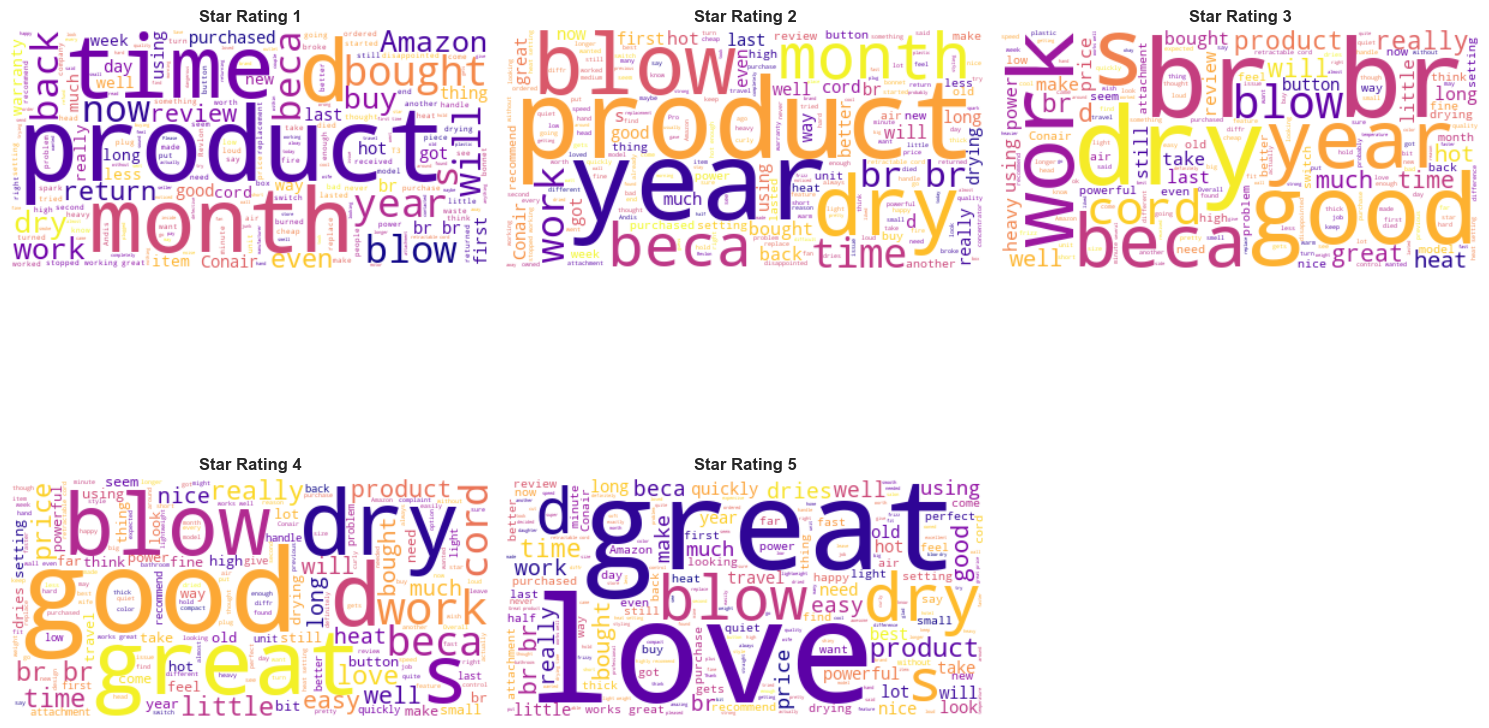

In [46]:
# 去除评论文本中的'hair'和'dryer'词语
data['review_body'] = data['review_body'].str.replace('hair', '').str.replace('dryer', '').str.replace('use', '')
common_quantifiers = ['one', 'two', 'three']  # 添加需要去除的常见量词
for quantifier in common_quantifiers:
    data['review_body'] = data['review_body'].str.replace(quantifier, '')
# 创建一个2x3的子图
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 遍历不同的星级评分
for rating in range(1, 6):
    # 选择特定星级评分的评论文本
    text = ' '.join(data[data['star_rating'] == rating]['review_body'].dropna())

    # 创建词云对象并生成词云图
    wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='plasma').generate(text)

    # 在对应的子图中显示词云图
    ax = axes[(rating-1)//3, (rating-1)%3]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Star Rating {rating}', fontdict={'fontweight': 'bold'})
    ax.axis('off')  # 不显示坐标轴
# 隐藏第六个子图
fig.delaxes(axes.flatten()[5])
# 调整子图之间的间距
plt.tight_layout()
plt.show()

按照星级评分将数据分割为不同的子集。
对每个子集内的review_body文本进行TF-IDF处理，将其转换为数值表示。
计算每个子集内所有文本对之间的相似度。
计算文本之间的相似度。

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['review_body'].values.astype('U'))  # 需要将文本数据转换为Unicode字符串

# 分割star_rating为三个区间：4和5、3、1和2
data['rating_group'] = pd.cut(data['star_rating'], bins=[0, 2, 3, 5], labels=['1-2', '3', '4-5'])

# 定义一个函数来计算TF-IDF矩阵的相似度
def calculate_similarity(matrix):
    return cosine_similarity(matrix)

similarity_matrices = []

# 计算每个区间内的相似度
for group in ['1-2', '3', '4-5']:
    # 选择特定评分区间的TF-IDF矩阵
    tfidf_matrix_group = tfidf_matrix[data['rating_group'] == group]
    # 计算相似度矩阵
    similarity_matrix = calculate_similarity(tfidf_matrix_group)
    # 添加到相似度矩阵列表中
    similarity_matrices.append(similarity_matrix)

    # 输出相似度矩阵
    print(f"Similarity matrix for rating group {group}:")
    print(similarity_matrix)


Similarity matrix for rating group 1-2:
[[1.         0.09316234 0.13463615 ... 0.12984335 0.15570779 0.18483745]
 [0.09316234 1.         0.14643426 ... 0.12789807 0.10285917 0.12473877]
 [0.13463615 0.14643426 1.         ... 0.16241221 0.0806497  0.15780538]
 ...
 [0.12984335 0.12789807 0.16241221 ... 1.         0.16172892 0.14946529]
 [0.15570779 0.10285917 0.0806497  ... 0.16172892 1.         0.17033917]
 [0.18483745 0.12473877 0.15780538 ... 0.14946529 0.17033917 1.        ]]
Similarity matrix for rating group 3:
[[1.         0.08357162 0.05630274 ... 0.11315383 0.07861223 0.07235062]
 [0.08357162 1.         0.26632776 ... 0.13227892 0.08014076 0.08964528]
 [0.05630274 0.26632776 1.         ... 0.08874704 0.05754155 0.12052793]
 ...
 [0.11315383 0.13227892 0.08874704 ... 1.         0.17506681 0.16837598]
 [0.07861223 0.08014076 0.05754155 ... 0.17506681 1.         0.17659746]
 [0.07235062 0.08964528 0.12052793 ... 0.16837598 0.17659746 1.        ]]
Similarity matrix for rating group

#### 将是否已验证购买转化为数字指标0 1，将评论转化为情感指标，

In [ ]:
# 将三个相似度矩阵可视化为热力图
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, similarity_matrix in enumerate(similarity_matrices):
    ax = axes[i]
    sns.heatmap(similarity_matrix, ax=ax, cmap="YlGnBu", annot=True, fmt=".2f")
    ax.set_title(f"Similarity Matrix for Rating Group {i+1}")
plt.tight_layout()
plt.show()


KeyboardInterrupt




#### 将是否已验证购买转化为数字指标0 1，将评论转化为情感指标，

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# 假设df是包含购买信息的DataFrame，其中有三列'review_body'、'verified_purchase'和'star_rating'
# 请根据实际情况替换为您的数据

# 读取包含购买信息的DataFrame
df = pd.read_csv('your_data.csv')  # 替换为实际的文件路径

# 将verified_purchase列中的Y和N转化为数字表示
df['verified_purchase'] = df['verified_purchase'].map({'Y': 1, 'N': 0})

# 对review_body列中的评论进行情感分析，转化为情感指标
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['review_body'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 将star_rating列中的数字转化为数字向量
star_rating_vector = df['star_rating'].values.reshape(-1, 1)

# 计算数据之间的相关性矩阵
correlation_matrix = df.corr()

# 绘制热力相关图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Correlation Matrix')
plt.show()